In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import keras
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## Download Pre Trained Weigths from Designated Dropbox:

In [3]:
%%capture
if not(os.path.isfile('vae_models.zip')):
  !wget -O vae_models.zip https://www.dropbox.com/s/tfca8qf0sj1avsk/vae_models.zip?dl=0
!unzip -o vae_models.zip

In [4]:
%%capture
if not(os.path.isfile('svm_models.zip')):
  !wget -O svm_models.zip https://www.dropbox.com/s/ry67cdfail2qgzn/svm_models.zip?dl=0
!unzip -o svm_models.zip

In [5]:
img_rows, img_cols, img_chns = 28, 28, 1
latent_dim = 128

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255.
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255.

4423680/4422102 [==============================] - 1s 0us/step


## Load Models

In [7]:
encoder = keras.models.load_model('vae_models/encoder.hdf5')
generator = keras.models.load_model('vae_models/generator.hdf5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/tensorflow-1.15.2/python3.6/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Test SVM Classification Results

In [8]:
batch_size = 100
X_test_latent = encoder.predict(X_test, batch_size=batch_size)
for sample_size in [100, 600, 1000, 3000]:
  svm = pickle.load(open('svm_models/svm' + '_' + str(sample_size) + '.hdf5', 'rb'))
  y_pred = svm.predict(X_test_latent)
  score = accuracy_score(y_test, y_pred)
  print('SVM Accuracy For %s Samples Fitting: %.1f %%' % (sample_size, 100. * score))


SVM Accuracy For 100 Samples Fitting: 65.6 %
SVM Accuracy For 600 Samples Fitting: 77.1 %
SVM Accuracy For 1000 Samples Fitting: 78.8 %
SVM Accuracy For 3000 Samples Fitting: 80.1 %


## Test Generator Results
Randomly create samples in the form of the latent variable and let the generator create sample Fashion MNIST images.

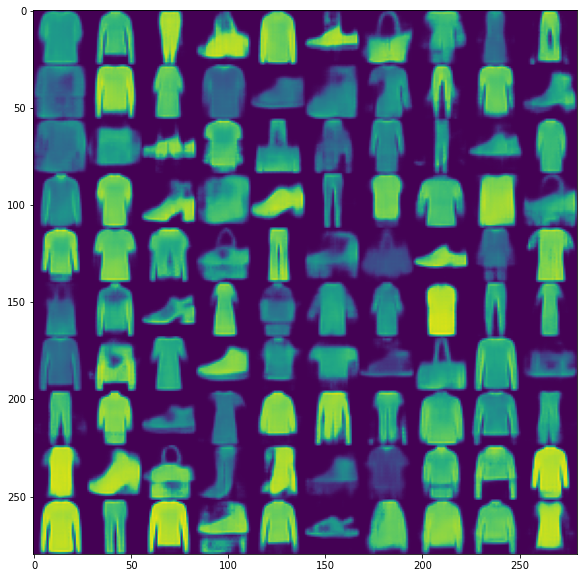

In [9]:
n = 10
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

for i in range(n):
    for j in range(n):
        z_sample = np.random.normal(size=latent_dim).reshape(1, latent_dim)
        x_decoded = generator.predict(z_sample, batch_size=1)
        digit = x_decoded.reshape(digit_size, digit_size)
        
        d_x = i * digit_size
        d_y = j * digit_size
        figure[d_x:d_x + digit_size, d_y:d_y + digit_size] = digit[:, :]

plt.figure(figsize=(10, 10))
plt.grid(b=False)
plt.imshow(figure)
plt.show()